# Exploratory Data Analysis

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import matplotlib.pyplot as plt

from configs import RAW_DATA_DIR, PROCESSED_DATA_DIR, SEED

## Data Loading

In [20]:
data = pd.read_csv(RAW_DATA_DIR / 'wiki_movie_plots_deduped.csv')
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


## Data Overview

In [21]:
data.shape

(34886, 8)

In [22]:
data.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [23]:
for i in range(3):
    print(f"Title: {data.iloc[i]['Title']}")
    print(f"Plot: {data.iloc[i]['Plot'][:500]}...")
    print("-" * 80)

Title: Kansas Saloon Smashers
Plot: A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]...
--------------------------------------------------------------------------------
Title: Love by the Light of the Moon
Plot: The moon, painted with a smiling face hangs over a park at night. A young couple walking past a fence learn on a railing and look up. The moon smiles. They embrace, and the moon's smile gets bigger. They then sit down on a bench by a tree. The moon's view is blocked, causing him to frown. In the last scene, the man fans the woman with

## Data Cleaning

In [24]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

data['Plot'] = data['Plot'].apply(clean_text)
data['Title'] = data['Title'].apply(clean_text)

In [25]:
# Check missing values
print(data.isnull().sum())

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64


In [26]:
# Drop rows with missing titles or plots
data = data.dropna(subset=['Title', 'Plot'])
data.shape

(34886, 8)

In [27]:
# Drop rows with duplicated titles or plots
data = data.drop_duplicates(subset=['Title', 'Plot'])
data.shape

(34313, 8)

In [28]:
data = data.reset_index(drop=True)

## Data Analysis

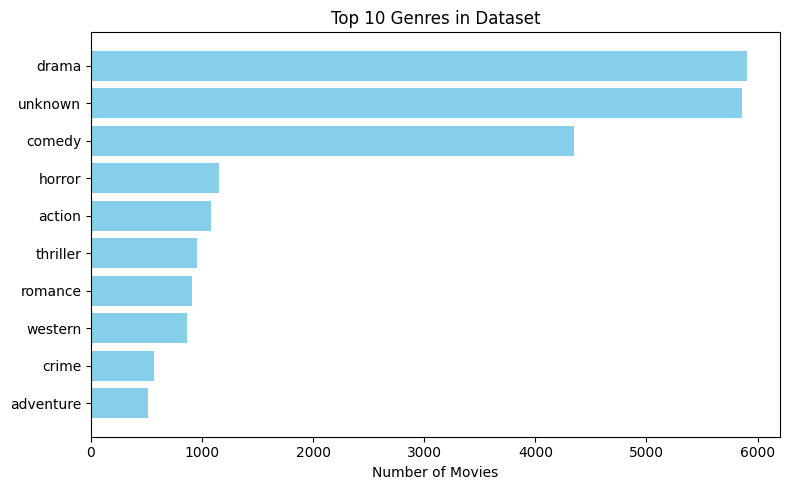

In [29]:
top_genres = data['Genre'].value_counts().nlargest(10).reset_index()
top_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(8, 5))
plt.barh(top_genres['Genre'], top_genres['Count'], color='skyblue')
plt.xlabel('Number of Movies')
plt.title('Top 10 Genres in Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.tight_layout()
plt.show()

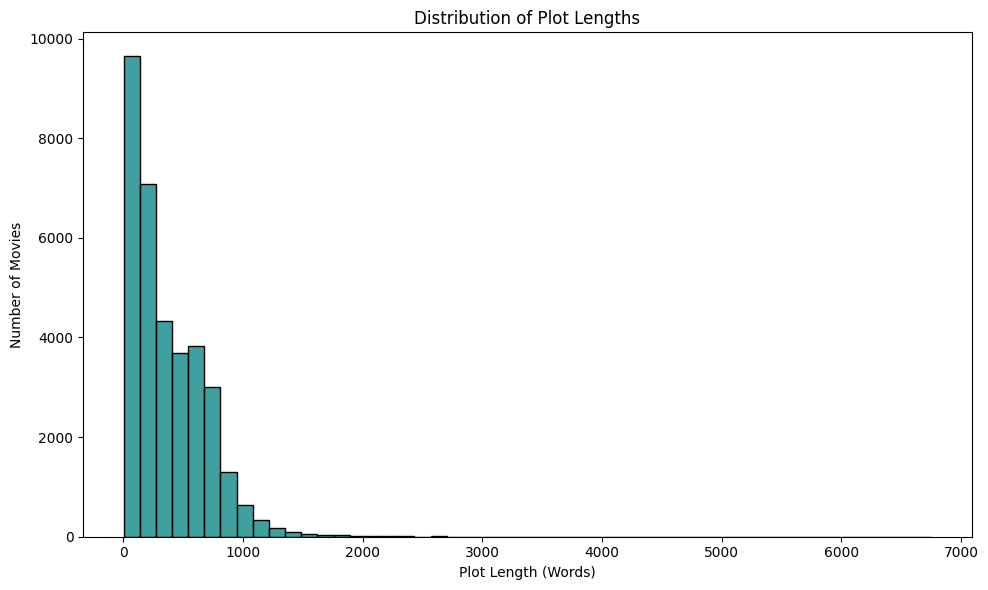

In [30]:
data['plot_length'] = data['Plot'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data['plot_length'], bins=50, kde=False, color='teal')
plt.xlabel('Plot Length (Words)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Plot Lengths')
plt.tight_layout()
plt.show()

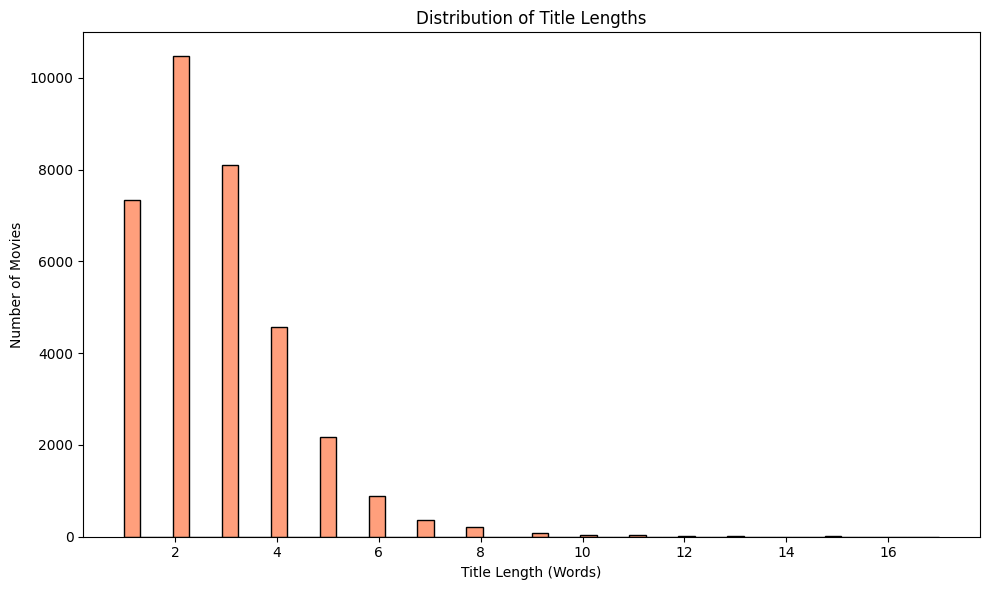

In [32]:
data['title_length'] = data['Title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data['title_length'], bins=50, kde=False, color='coral')
plt.xlabel('Title Length (Words)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Title Lengths')
plt.tight_layout()
plt.show()

## Data Processing

In [33]:
data = data[['Plot', 'Title']]
data.columns = ['input_text', 'target_text']

In [34]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=SEED)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=SEED)

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 21960, Validation: 5490, Test: 6863


In [35]:
train_df.to_csv(PROCESSED_DATA_DIR / 'train.csv', index=False, sep=';')
val_df.to_csv(PROCESSED_DATA_DIR / 'val.csv', index=False, sep=';')
test_df.to_csv(PROCESSED_DATA_DIR / 'test.csv', index=False, sep=';')